In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data/position_salaries.csv")
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

# How to train a polynomial data set with linear regression ?

In [5]:
from learnML.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(X, degree=5)
X_poly = poly_reg.transform(X)
X_poly

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

In [6]:
from learnML.preprocessing import ZScoreNormalization

x_scalar = ZScoreNormalization(X_poly)
y_scalar = ZScoreNormalization(y)

x_scalar.fit()
y_scalar.fit()

In [7]:
from learnML.regression import LinearRegression

lin_reg = LinearRegression(
    learning_rate=0.0001, n_iterations=10000, x_scalar=x_scalar, y_scalar=y_scalar
)
lin_reg.fit(X_poly, y)

Iteration:      0 | Cost: 4.995649e-01
Iteration:   1000 | Cost: 2.193034e-01
Iteration:   2000 | Cost: 1.110054e-01
Iteration:   3000 | Cost: 6.869919e-02
Iteration:   4000 | Cost: 5.173588e-02
Iteration:   5000 | Cost: 4.452258e-02
Iteration:   6000 | Cost: 4.107713e-02
Iteration:   7000 | Cost: 3.910385e-02
Iteration:   8000 | Cost: 3.772109e-02
Iteration:   9000 | Cost: 3.658966e-02
Iteration:  10000 | Cost: 3.557942e-02


In [8]:
print(f"After training: w = {lin_reg.get_weights()}, b = {lin_reg.get_intercept()}")

After training: w = [0.11345871 0.16281629 0.20136884 0.23088111 0.25354211], b = -5.045963646921289e-18


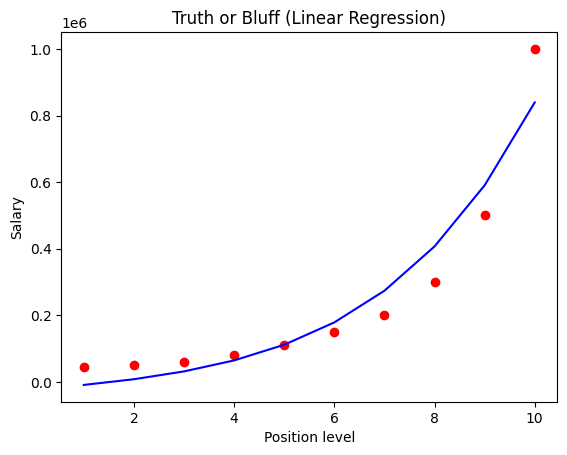

In [9]:
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X_poly), color="blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

# How to train a polynomial data set with polynomial regression ?

In [10]:
x_scalar_2 = ZScoreNormalization(X)
y_scalar_2 = ZScoreNormalization(y)

x_scalar_2.fit()
y_scalar_2.fit()

In [11]:
from learnML.regression import PolynomialRegression

model = PolynomialRegression(
    learning_rate=0.005,
    n_iterations=10000,
    degree=4,
    x_scalar=x_scalar_2,
    y_scalar=y_scalar_2,
)

model.fit(X, y)

Iteration:      0 | Cost: 4.758333e-01
Iteration:   1000 | Cost: 1.555629e-03
Iteration:   2000 | Cost: 1.383449e-03
Iteration:   3000 | Cost: 1.353551e-03
Iteration:   4000 | Cost: 1.335666e-03
Iteration:   5000 | Cost: 1.324434e-03
Iteration:   6000 | Cost: 1.317234e-03
Iteration:   7000 | Cost: 1.312574e-03
Iteration:   8000 | Cost: 1.309543e-03
Iteration:   9000 | Cost: 1.307567e-03
Iteration:  10000 | Cost: 1.306280e-03


In [12]:
print(f"After training: w = {lin_reg.get_weights()}, b = {lin_reg.get_intercept()}")

After training: w = [0.11345871 0.16281629 0.20136884 0.23088111 0.25354211], b = -5.045963646921289e-18


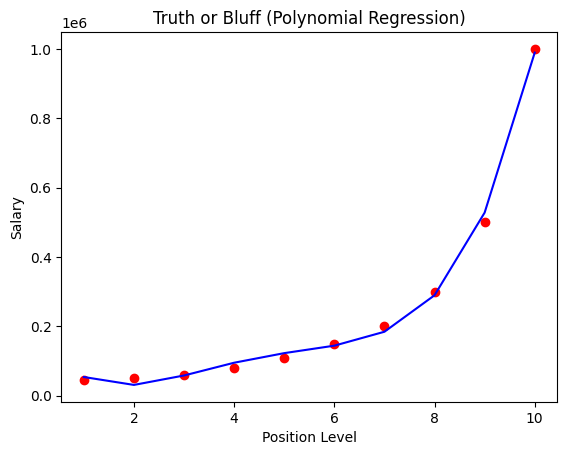

In [13]:
plt.scatter(X, y, color="red")
plt.plot(X, model.predict(X), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Smooth Curve

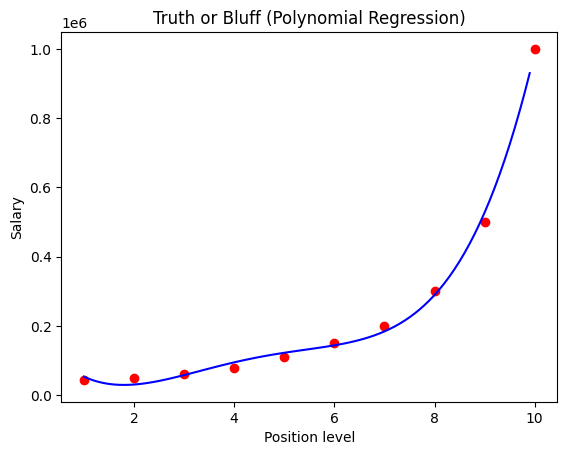

In [14]:
X_grid = np.arange(1, 10, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()